# December 2022 demo - MIRA Domain Knowledge Graph
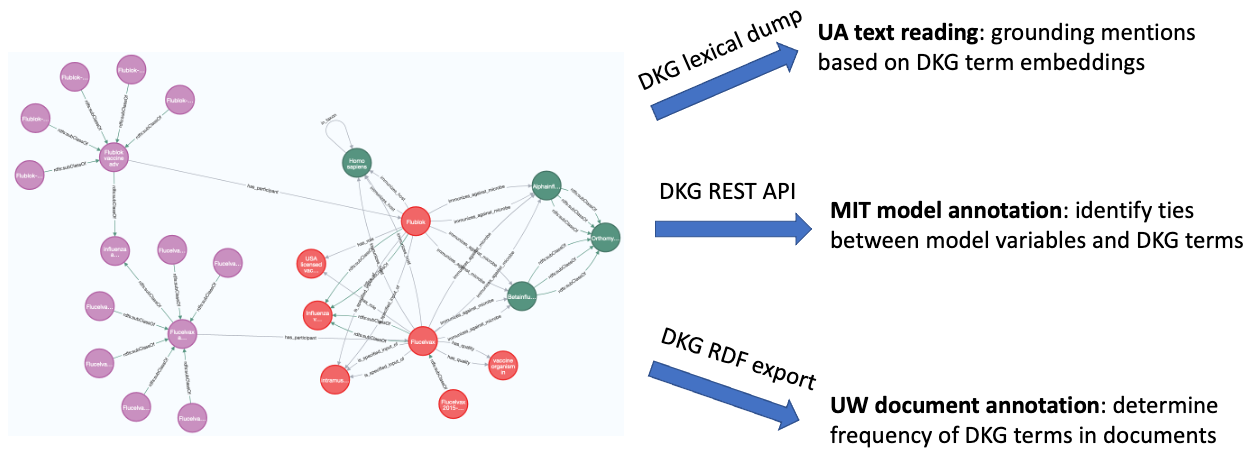

### What kinds of roles does the DKG play?

#### 1. Controlled vocabulary
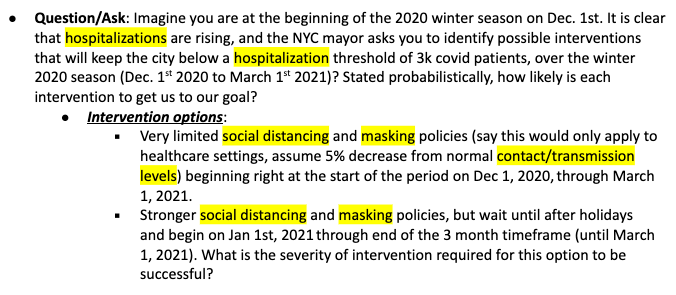

   Being able to refer to terms using identifiers or standardized names. Example: Scenario 1, "vaccination".

In [14]:
import requests
MIRA_URL = 'http://34.230.33.149:8771/api'

In [15]:
terms = ["hospitalization", "social distancing", "masking", "contact rate"]

In [16]:
for term in terms:
    res = requests.get(MIRA_URL + '/search', params={'q': term, 'limit': 1})
    print(term)
    print('----')
    print(json.dumps(res.json(), indent=1))
    print()

hospitalization
----
[
 {
  "id": "ncit:C25179",
  "name": "Hospitalization",
  "type": "class",
  "obsolete": false,
  "description": "The condition of being treated as a patient in a hospital.",
  "synonyms": [
   {
    "value": "Hospitalized",
    "type": "oboinowl:hasExactSynonym"
   },
   {
    "value": "HOSPITALIZATION",
    "type": "oboinowl:hasExactSynonym"
   },
   {
    "value": "Hospitalization",
    "type": "oboinowl:hasExactSynonym"
   }
  ],
  "xrefs": [],
  "labels": [
   "ncit"
  ],
  "properties": {}
 }
]

social distancing
----
[
 {
  "id": "ncit:C173636",
  "name": "Social Distancing",
  "type": "class",
  "obsolete": false,
  "description": "The practice of keeping a safe space between yourself and other people.",
  "synonyms": [
   {
    "value": "Social Distancing",
    "type": "oboinowl:hasExactSynonym"
   },
   {
    "value": "Social Distancing or Physical Distancing",
    "type": "oboinowl:hasExactSynonym"
   },
   {
    "value": "Physical Distancing",
    "typ

### 2. Alignment between distinct artifacts
Being able to connect models, data, queries, documents, etc. via shared terms.

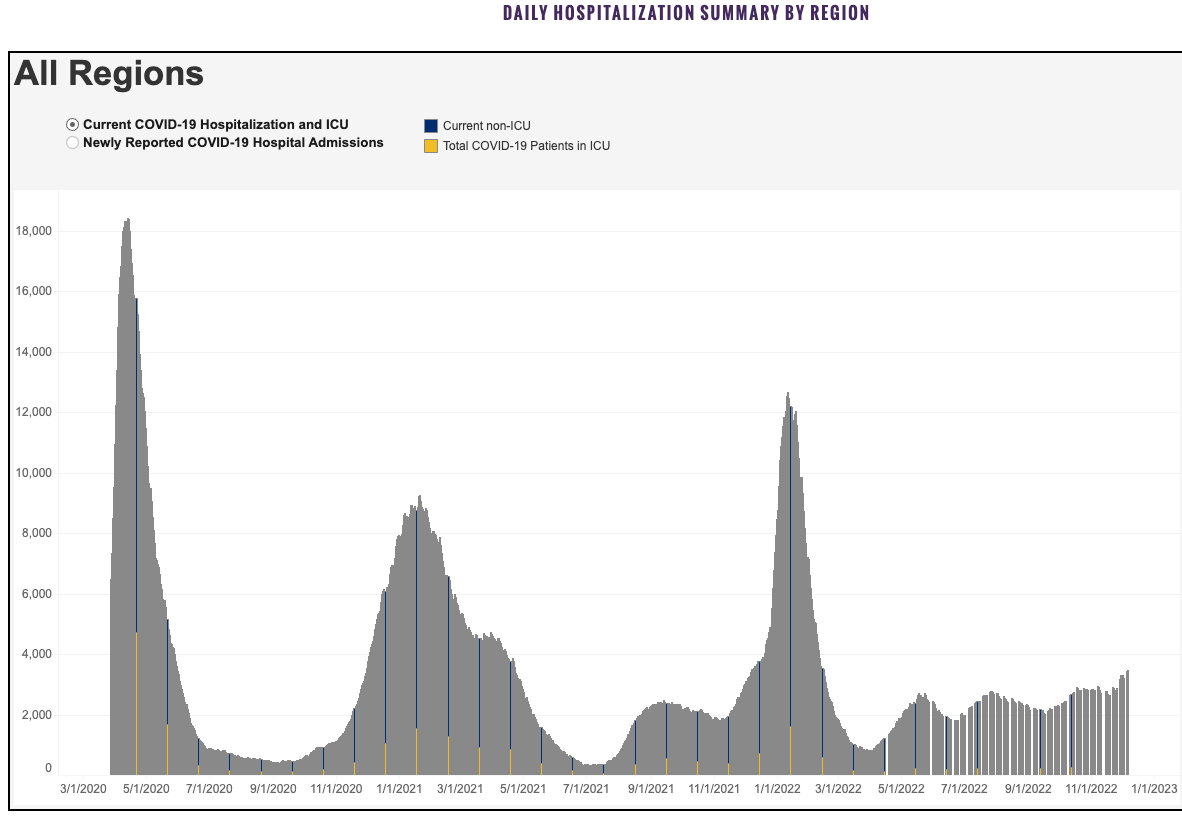

In [7]:
terms = ["hospitalization", "reciprocal day"]
for term in terms:
    res = requests.get(MIRA_URL + '/search', params={'q': term, 'limit': 1})
    print(term)
    print('----')
    print(json.dumps(res.json(), indent=1))
    print()

hospitalization
----
[
 {
  "id": "ncit:C25179",
  "name": "Hospitalization",
  "type": "class",
  "obsolete": false,
  "description": "The condition of being treated as a patient in a hospital.",
  "synonyms": [
   {
    "value": "Hospitalized",
    "type": "oboinowl:hasExactSynonym"
   },
   {
    "value": "HOSPITALIZATION",
    "type": "oboinowl:hasExactSynonym"
   },
   {
    "value": "Hospitalization",
    "type": "oboinowl:hasExactSynonym"
   }
  ],
  "xrefs": [],
  "labels": [
   "ncit"
  ],
  "properties": {}
 }
]

reciprocal day
----
[
 {
  "id": "wikidata:Q102129592",
  "name": "reciprocal day",
  "type": "class",
  "obsolete": false,
  "description": "unit of reciprocal duration",
  "synonyms": [],
  "xrefs": [
   {
    "id": "qudt:PER-DAY",
    "type": "oboinowl:hasDbXref"
   }
  ],
  "labels": [
   "unit",
   "wikidata"
  ],
  "properties": {}
 }
]



### 3. Semantic contextualization
Providing background domain knowledge related to each term.

In [8]:
terms = ["masking", "non-pharmaceutical intervention"]
for term in terms:
    res = requests.get(MIRA_URL + '/search', params={'q': term, 'limit': 1})
    print(term)
    print('----')
    print(json.dumps(res.json(), indent=1))
    print()

masking
----
[
 {
  "id": "askemo:0000015",
  "name": "masking",
  "type": "class",
  "obsolete": false,
  "description": "The practice of wearing a protective face mask.",
  "synonyms": [
   {
    "value": "wearing a mask",
    "type": "oboInOwl:hasExactSynonym"
   }
  ],
  "alts": [],
  "xrefs": [],
  "labels": [
   "askemo"
  ],
  "properties": {}
 }
]

non-pharmaceutical intervention
----
[
 {
  "id": "cemo:non-pharmaceutical_interventions",
  "name": "non-pharmaceutical interventions",
  "type": "class",
  "obsolete": false,
  "synonyms": [],
  "xrefs": [],
  "labels": [
   "cemo"
  ],
  "properties": {}
 }
]



In [9]:
requests.post("http://34.230.33.149:8771/api/relations",
              json={"source_curie": "askemo:0000015", "relation": "subclass"}).json()

[{'subject': 'askemo:0000015',
  'predicate': 'rdfs:subClassOf',
  'object': 'cemo:non-pharmaceutical_interventions'}]

## New feature: units and measures as terms

In [10]:
res = requests.get(MIRA_URL + '/search', params={'q': 'day'})
res.json()[0]

{'id': 'wikidata:Q573',
 'name': 'day',
 'type': 'class',
 'obsolete': False,
 'description': "unit of time lasting 24 hours, derived from the period of Earth's rotation about its axis",
 'synonyms': [],
 'xrefs': [{'id': 'qudt:DAY', 'type': 'oboinowl:hasDbXref'}],
 'labels': ['unit', 'wikidata'],
 'properties': {}}

In [11]:
res = requests.get(MIRA_URL + '/search', params={'q': 'percent'})
res.json()[0]

{'id': 'wikidata:Q11229',
 'name': 'percent',
 'type': 'class',
 'obsolete': False,
 'description': 'number or ratio as a fraction of 100',
 'synonyms': [],
 'xrefs': [{'id': 'qudt:PERCENT', 'type': 'oboinowl:hasDbXref'}],
 'labels': ['unit', 'wikidata'],
 'properties': {}}

In [12]:
res = requests.get(MIRA_URL + '/search', params={'q': 'fraction'})
res.json()[0]

{'id': 'uo:0000191',
 'name': 'fraction',
 'type': 'class',
 'obsolete': False,
 'description': 'A dimensionless ratio unit which relates the part (the numerator) to the whole (the denominator).',
 'synonyms': [],
 'xrefs': [],
 'labels': ['uo'],
 'properties': {}}

## New feature: symbols as synonyms

In [13]:
res = requests.get(MIRA_URL + '/search', params={'q': 'recovery rate'})
res.json()[0]

{'id': 'askemo:0000013',
 'name': 'recovery rate',
 'type': 'class',
 'obsolete': False,
 'description': 'The rate at which individuals recover after being infected.',
 'synonyms': [{'value': 'γ', 'type': 'referenced_by_symbol'},
  {'value': '\\gamma', 'type': 'referenced_by_latex'}],
 'alts': [],
 'xrefs': [],
 'labels': ['askemo'],
 'properties': {'suggested_unit': ['1 / day'],
  'suggested_data_type': ['float'],
  'physical_min': ['0.0']},
 'physical_min': 0.0,
 'suggested_data_type': 'float',
 'suggested_unit': '1 / day'}